In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Excel file
file_path = "/Users/matanoz/Documents/לימודים תואר שני/סמסטר ב׳/data-science2-lab-final-project/src/team_7/task_11/UOR.xlsx"
df = pd.read_excel(file_path)
df.head()

תאריך  מחלקה  כמות שוהים  שיעור תפוסה
0 2020-01-01 07:00:00      4          31        0.775
1 2020-01-01 07:00:00      2          30        0.750
2 2020-01-01 07:00:00      5          40        1.000
3 2020-01-01 07:00:00      1          32        0.800
4 2020-01-01 07:00:00      3          37        0.925

In [ ]:
# %%

# Translate column names to English
column_translation = {
    "תאריך": "Date",
    "מחלקה": "Department",
    "כמות שוהים": "Occupancy",
    "שיעור תפוסה": "Occupancy Rate",
    # Add all other columns that need to be translated
}

df.rename(columns=column_translation, inplace=True)
df.head()

Date  Department  Occupancy  Occupancy Rate
0 2020-01-01 07:00:00           4         31           0.775
1 2020-01-01 07:00:00           2         30           0.750
2 2020-01-01 07:00:00           5         40           1.000
3 2020-01-01 07:00:00           1         32           0.800
4 2020-01-01 07:00:00           3         37           0.925

In [ ]:
# %%

# Group data by Department
grouped_df = df.groupby("Department")

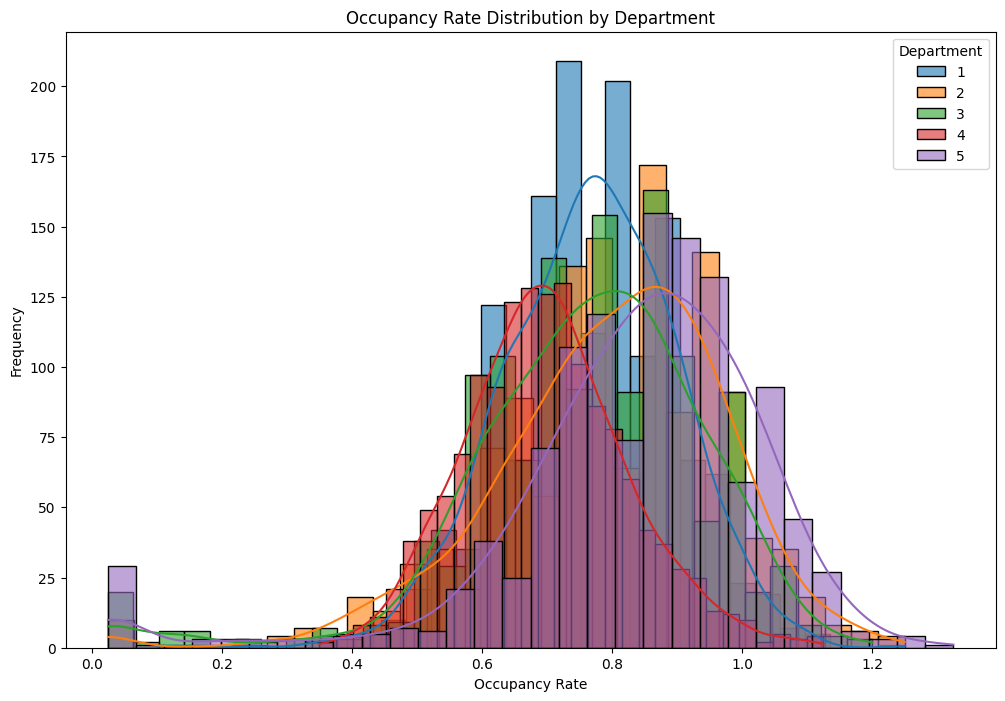

In [ ]:
# %%

# Plot Occupancy Rate distribution by Department
plt.figure(figsize=(12, 8))
for department, group in grouped_df:
    sns.histplot(
        group["Occupancy Rate"], kde=True, bins=30, label=department, alpha=0.6
    )
plt.title("Occupancy Rate Distribution by Department")
plt.xlabel("Occupancy Rate")
plt.ylabel("Frequency")
plt.legend(title="Department")
plt.show()

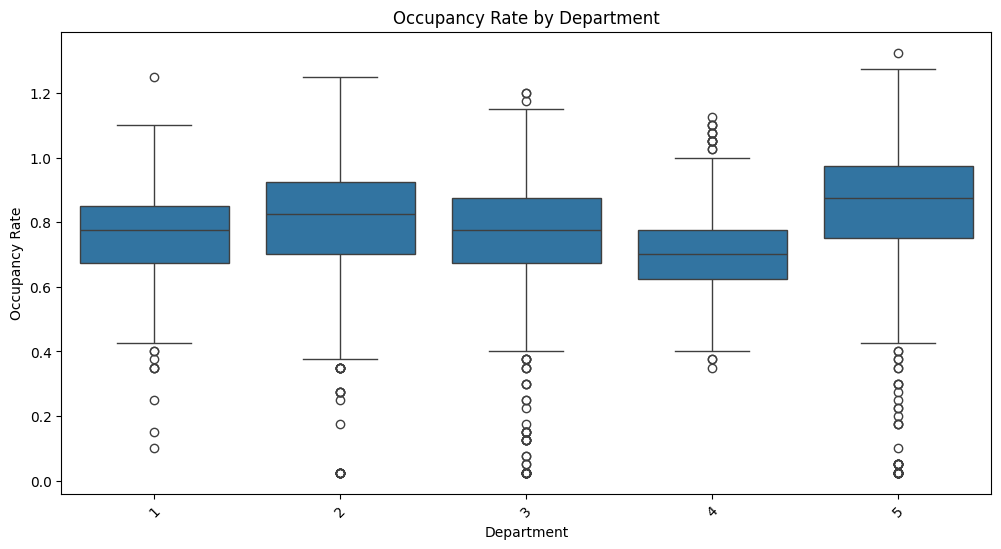

In [ ]:
# %%

# Boxplot of Occupancy Rate by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x="Department", y="Occupancy Rate", data=df)
plt.title("Occupancy Rate by Department")
plt.xlabel("Department")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.show()

<ipython-input-6-417bb312c61d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Department", y="Occupancy Rate", data=df, inner="box", palette="Set2")


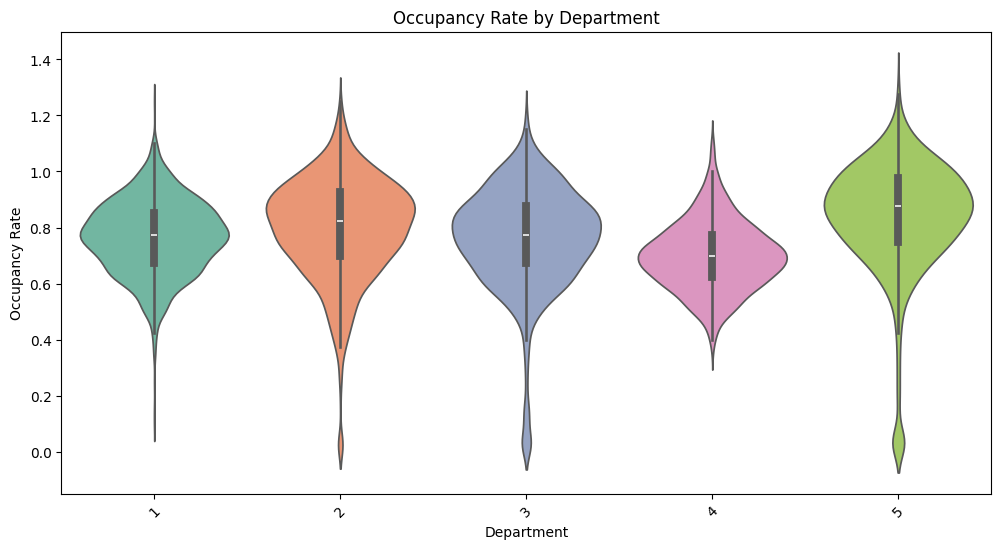

In [ ]:
# %%

# Violin plot with boxplot of Occupancy Rate by Department with different colors
plt.figure(figsize=(12, 6))
sns.violinplot(x="Department", y="Occupancy Rate", data=df, inner="box", palette="Set2")
plt.title("Occupancy Rate by Department")
plt.xlabel("Department")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.show()

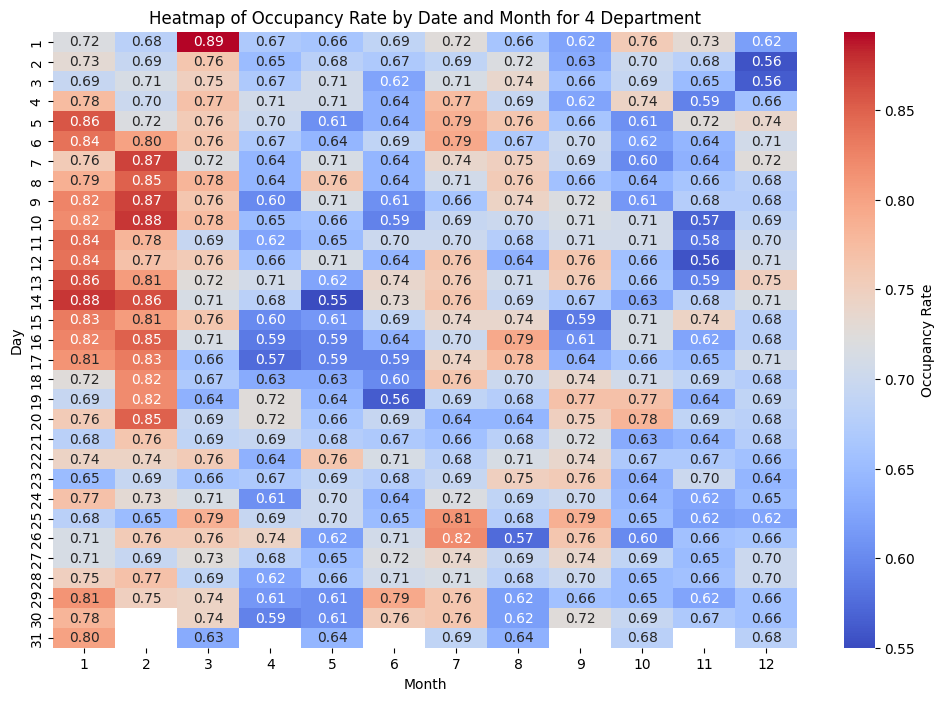

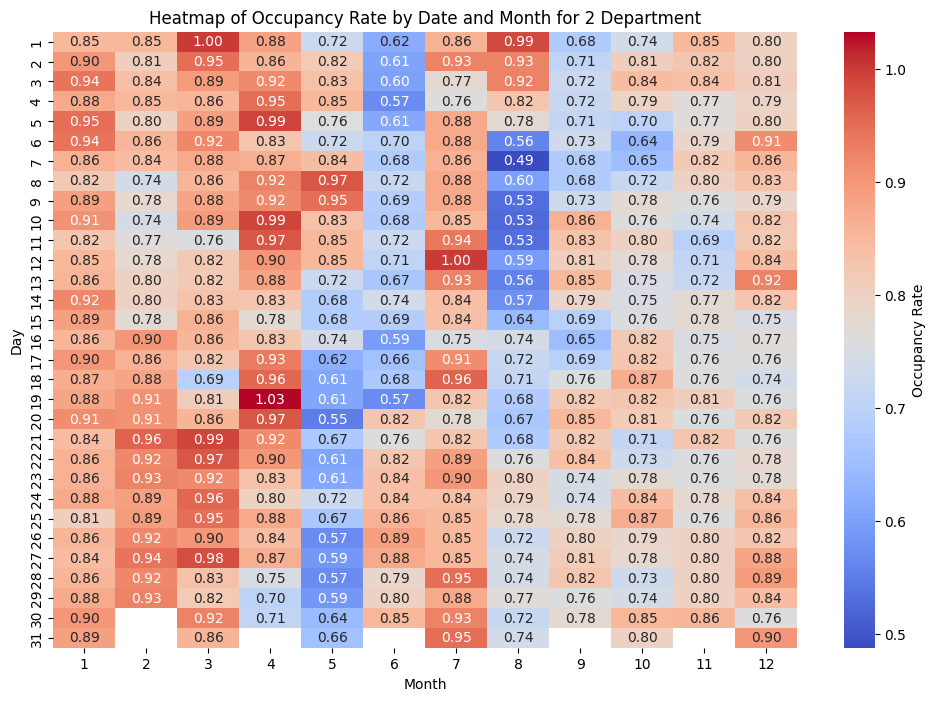

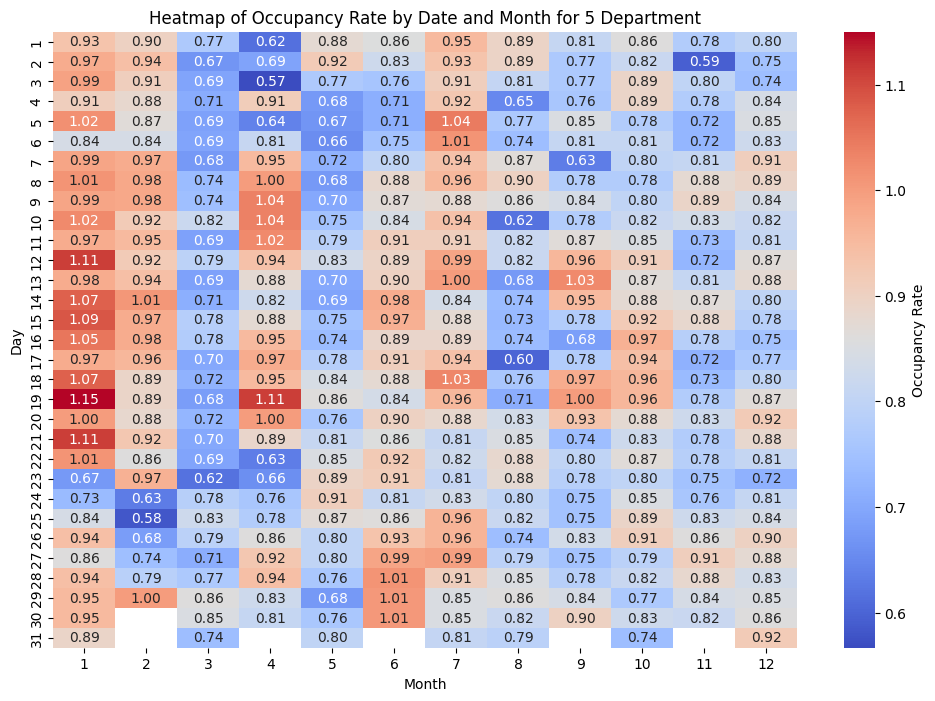

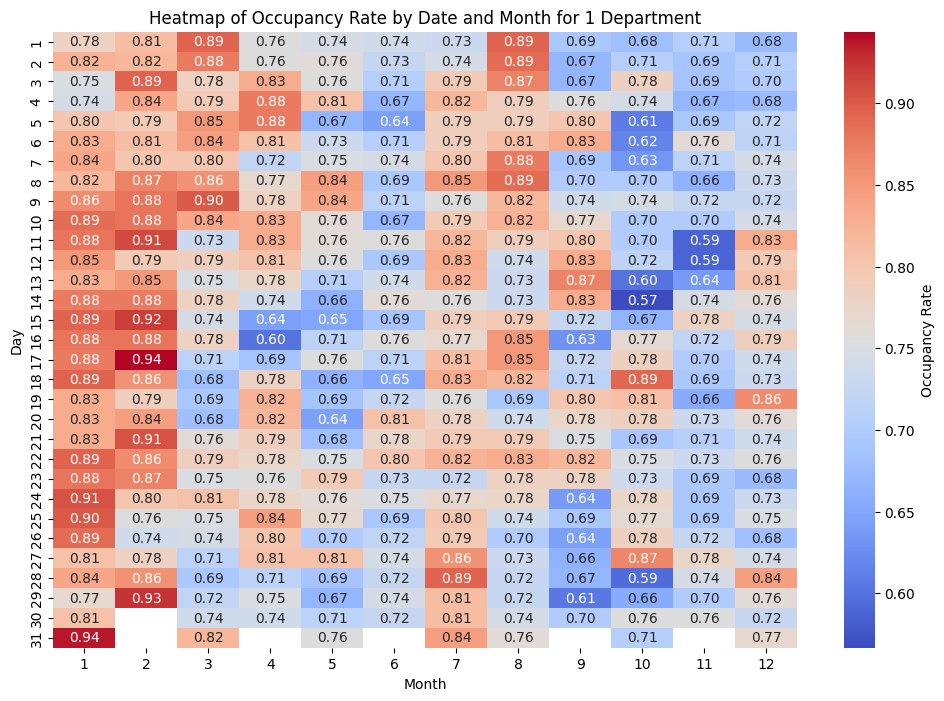

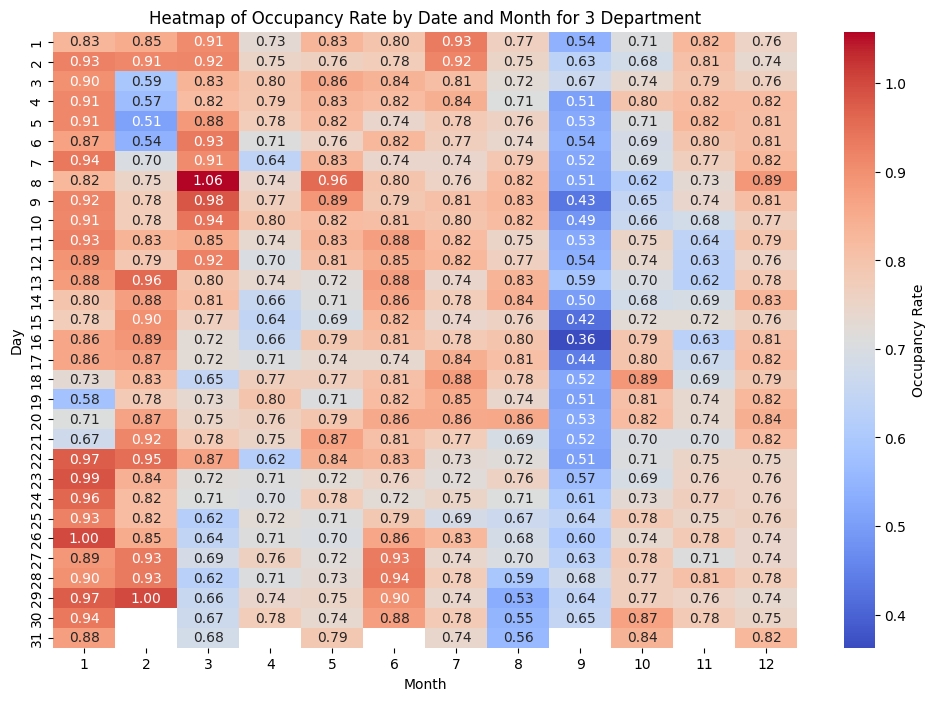

In [ ]:
# %%

# Extract Month and Day from the Date column
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day


# Create a heatmap for each department
departments = df["Department"].unique()

for department in departments:
    # Filter data for the specific department
    department_df = df[df["Department"] == department]

    # Create a pivot table with Month as columns and Day as rows
    pivot_table = department_df.pivot_table(
        index="Day", columns="Month", values="Occupancy Rate", aggfunc="mean"
    )

    # Plotting the heatmap with correct scale and annotations
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pivot_table,
        cmap="coolwarm",
        annot=True,
        fmt=".2f",
        cbar_kws={"label": "Occupancy Rate"},
        vmin=pivot_table.min().min(),
        vmax=pivot_table.max().max(),
    )
    plt.title(
        f"Heatmap of Occupancy Rate by Date and Month for {department} Department"
    )
    plt.xlabel("Month")
    plt.ylabel("Day")
    plt.show()

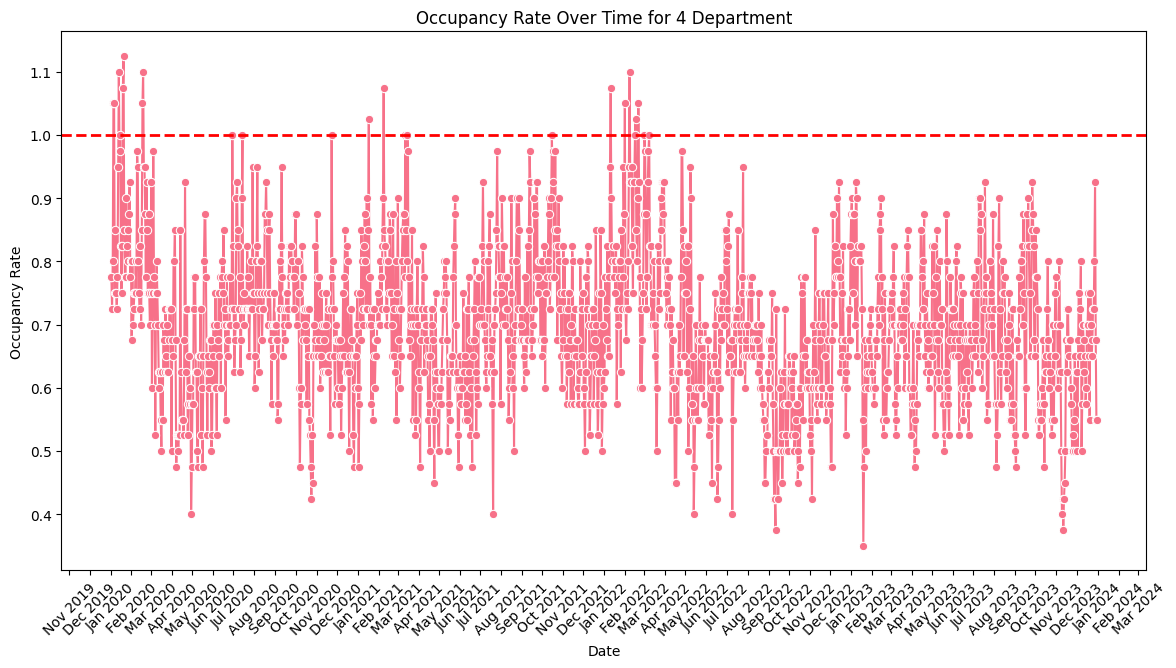

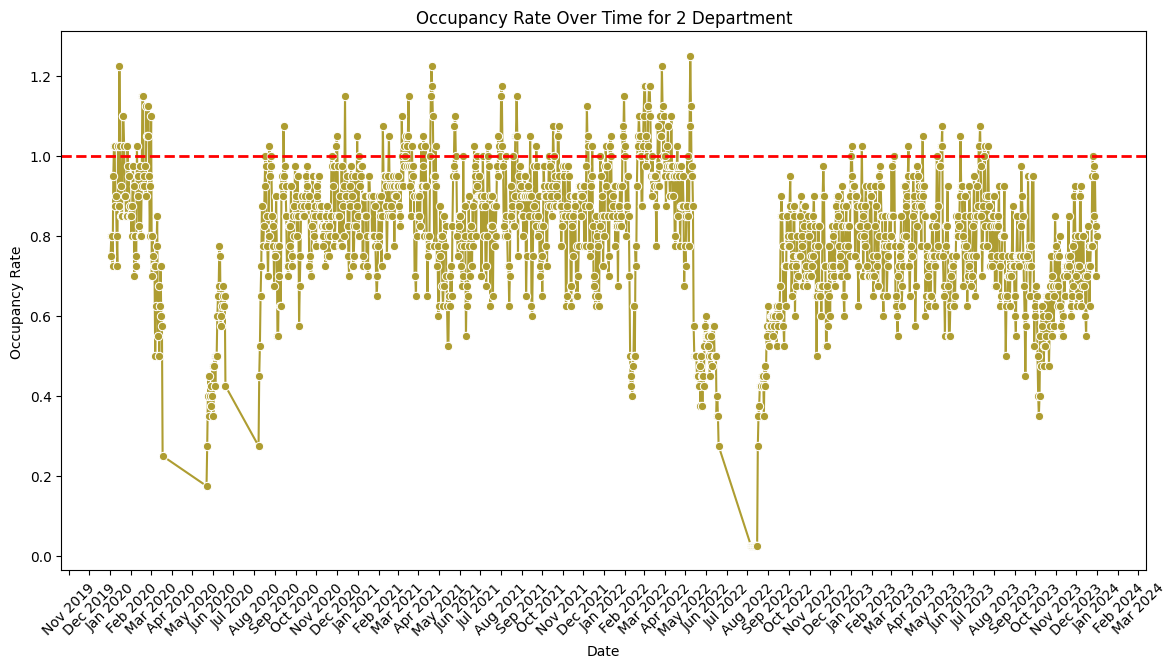

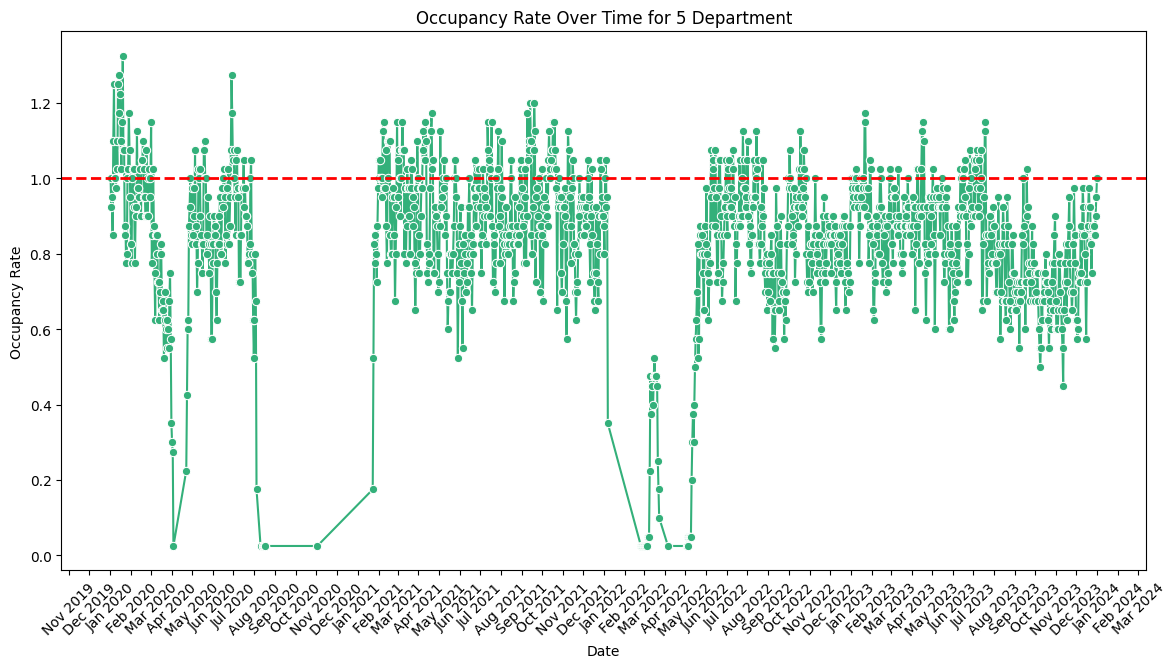

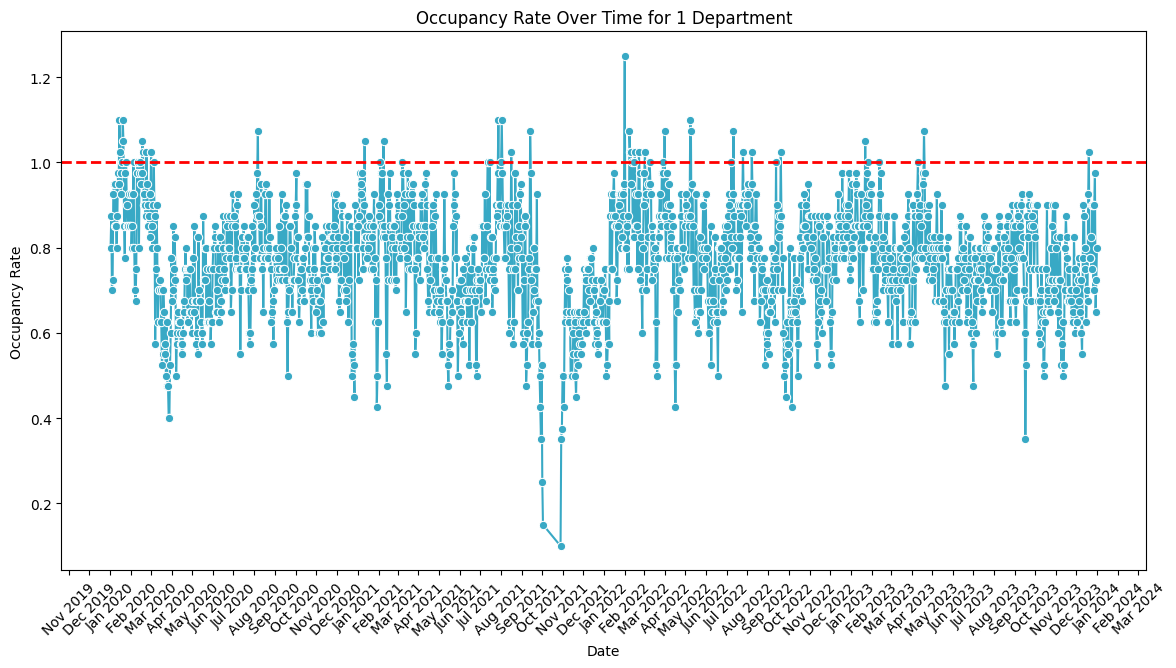

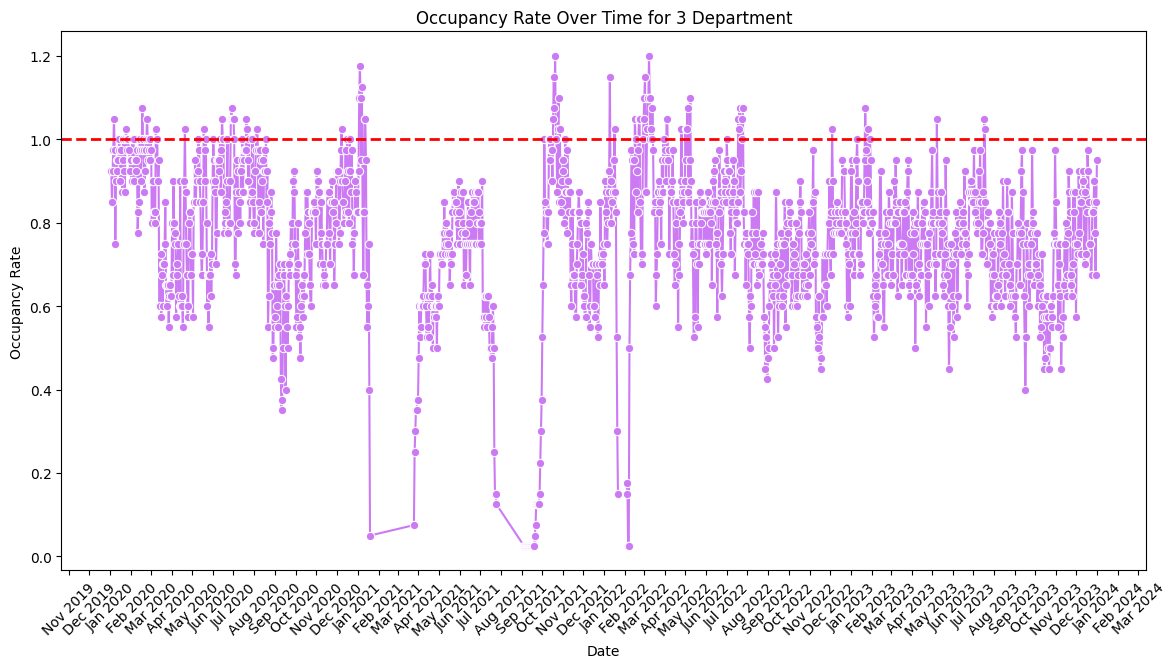

In [ ]:
# %%

import matplotlib.dates as mdates

# Define a color palette for the departments
palette = sns.color_palette("husl", len(departments))

# Create a line plot of Occupancy Rate over time for each department
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Create a line plot of Occupancy Rate over time
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        x="Date", y="Occupancy Rate", data=department_df, marker="o", color=palette[idx]
    )

    # Add a red line at 100% Occupancy Rate
    plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2)

    # Set x-axis major locator to month and format the labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

    plt.title(f"Occupancy Rate Over Time for {department} Department")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate")
    plt.xticks(rotation=45)
    plt.show()

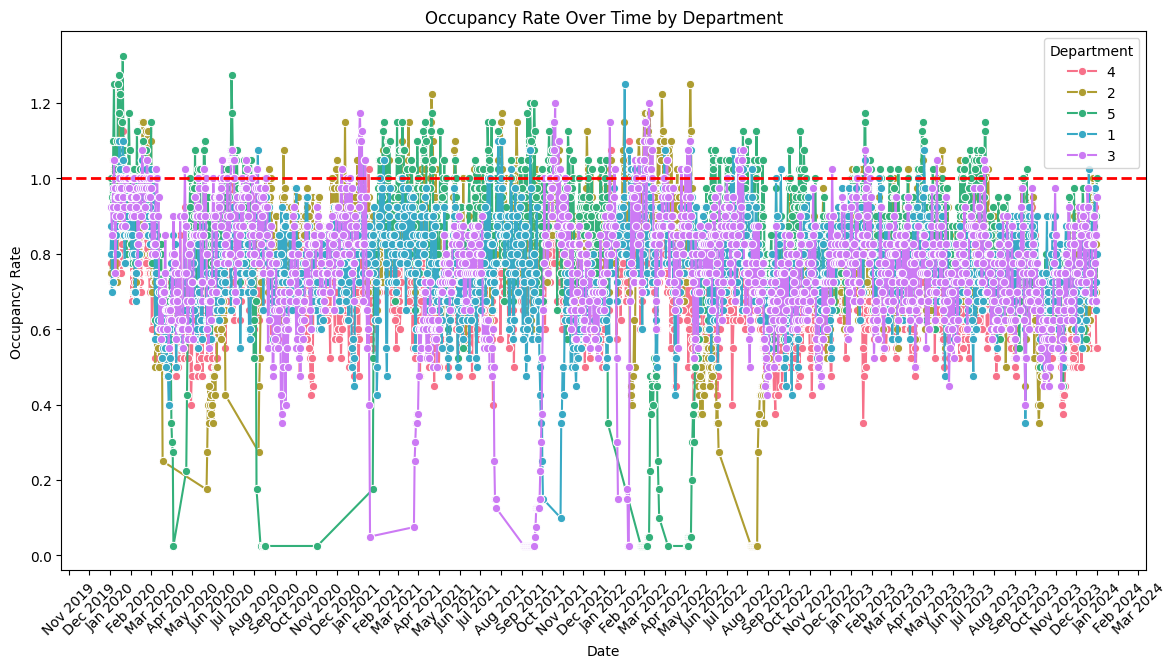

In [ ]:
# %%

import matplotlib.dates as mdates

# Create a line plot comparing Occupancy Rates over time across all departments
plt.figure(figsize=(14, 7))

# Iterate through each department and plot its occupancy rate
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Create a line plot of Occupancy Rate over time with unique color for each department
    sns.lineplot(
        x="Date",
        y="Occupancy Rate",
        data=department_df,
        marker="o",
        label=department,
        color=palette[idx],
    )

# Add a red line at 100% Occupancy Rate
plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2)

# Set x-axis major locator to month and format the labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.title("Occupancy Rate Over Time by Department")
plt.xlabel("Date")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.legend(title="Department")
plt.show()

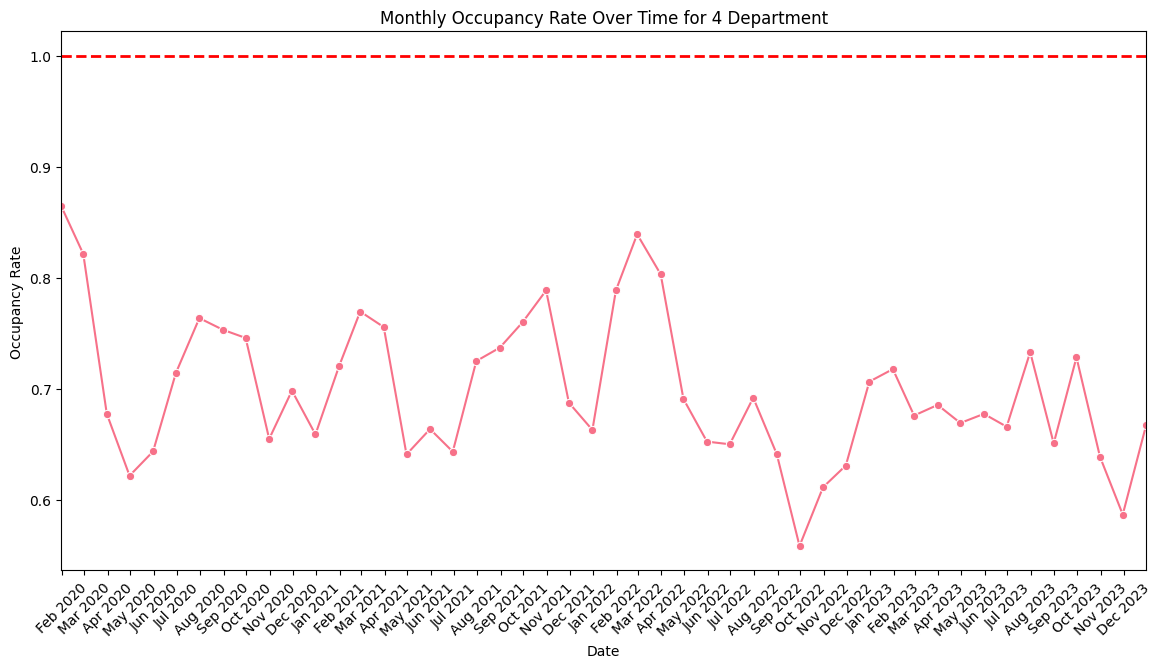

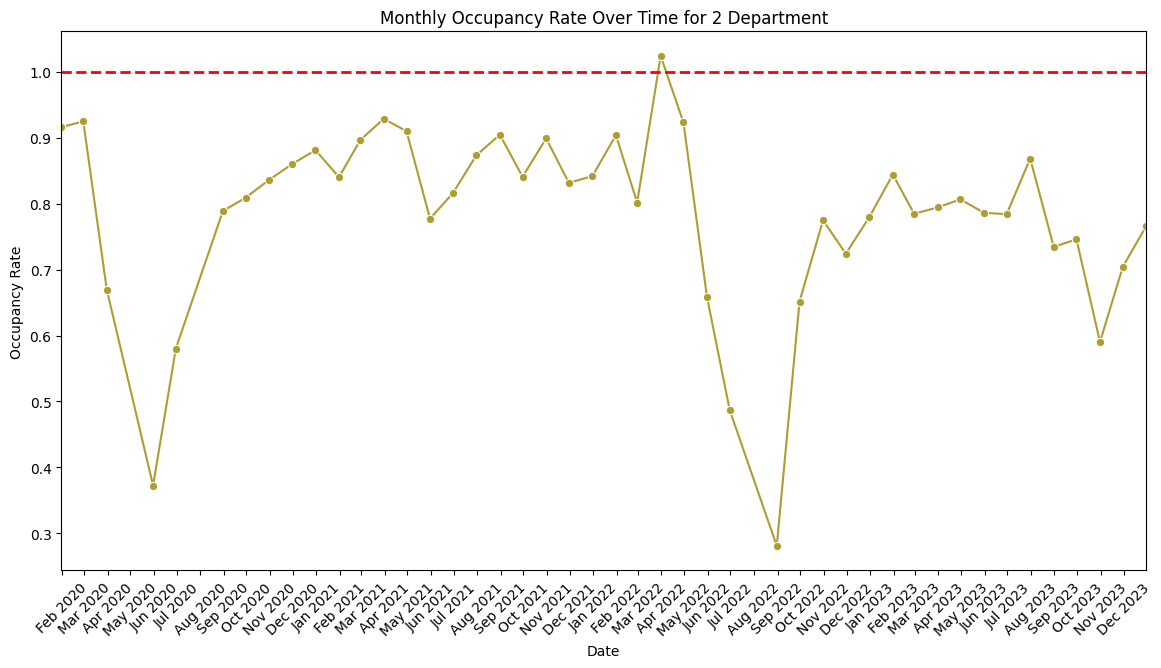

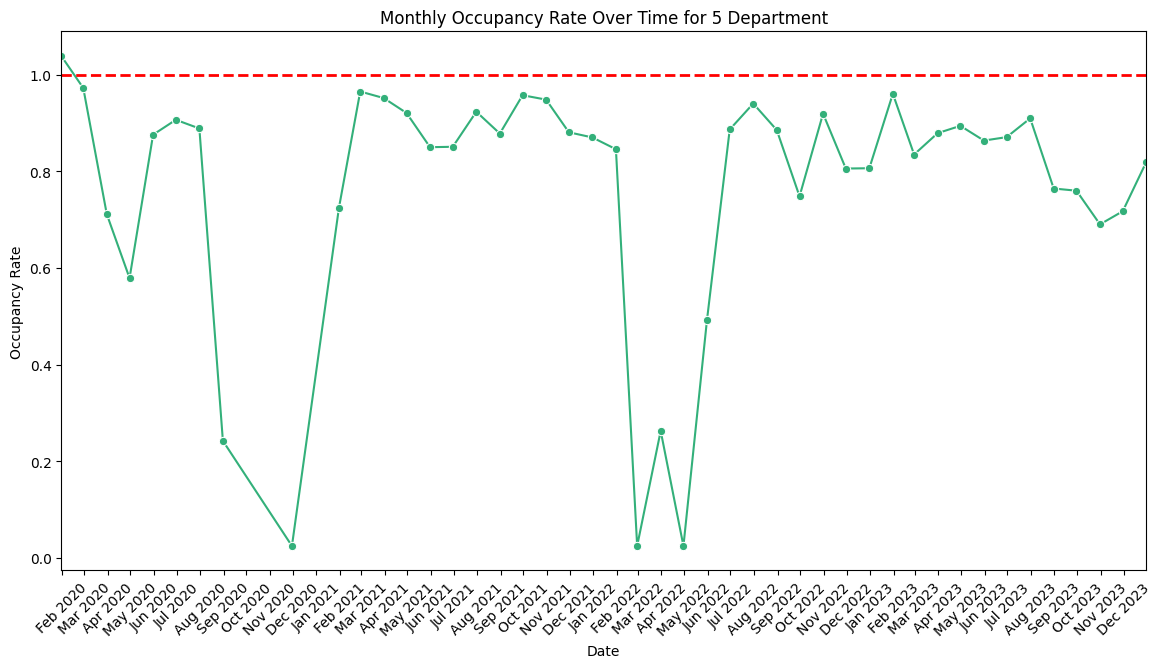

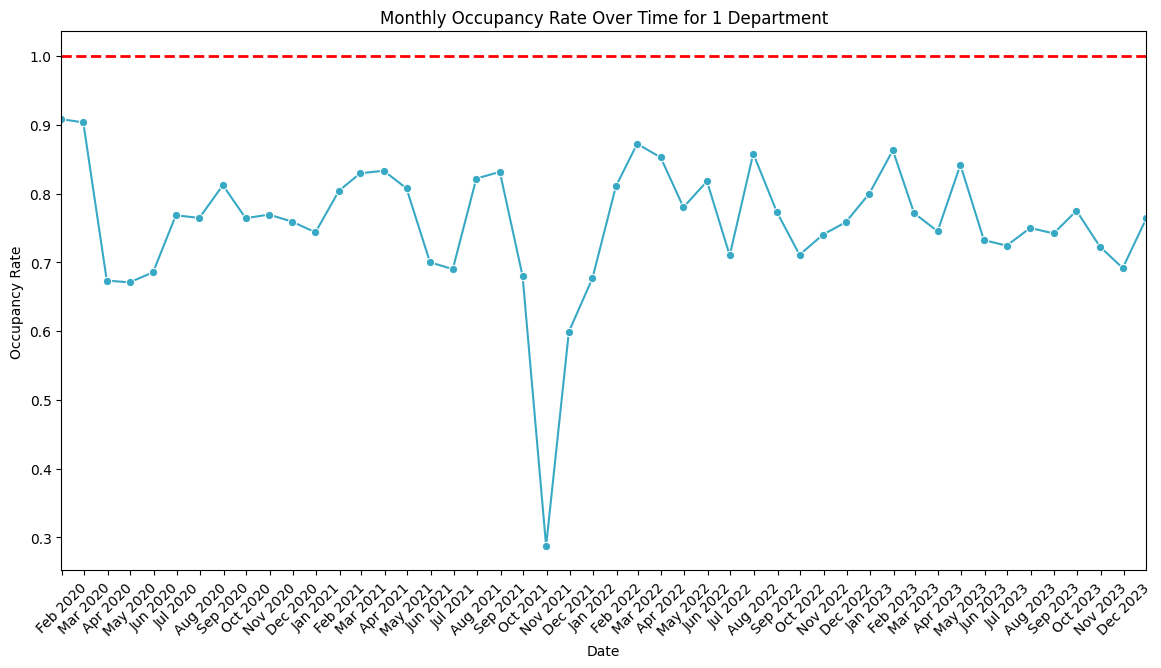

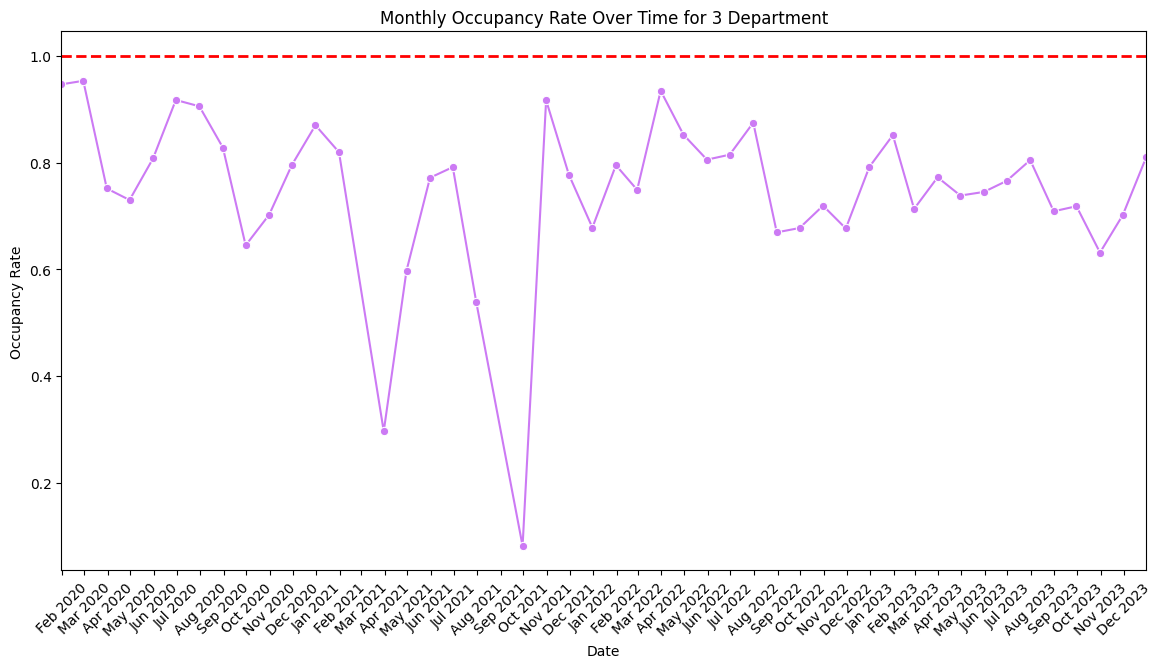

In [ ]:
# %%

import matplotlib.dates as mdates

# Define a color palette for the departments
palette = sns.color_palette("husl", len(departments))

# Create a line plot of Occupancy Rate over time for each department (aggregated by month)
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Resample the data to monthly frequency and calculate the mean occupancy rate for each month
    department_monthly = department_df.resample("M", on="Date").mean()

    # Create a line plot of Occupancy Rate over time (by month)
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        x=department_monthly.index,
        y="Occupancy Rate",
        data=department_monthly,
        marker="o",
        color=palette[idx],
    )

    # Add a red line at 100% Occupancy Rate
    plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2)

    # Set x-axis major locator to month and format the labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

    # Ensure the x-axis matches the time period of the samples
    plt.xlim(department_monthly.index.min(), department_monthly.index.max())

    plt.title(f"Monthly Occupancy Rate Over Time for {department} Department")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate")
    plt.xticks(rotation=45)
    plt.show()

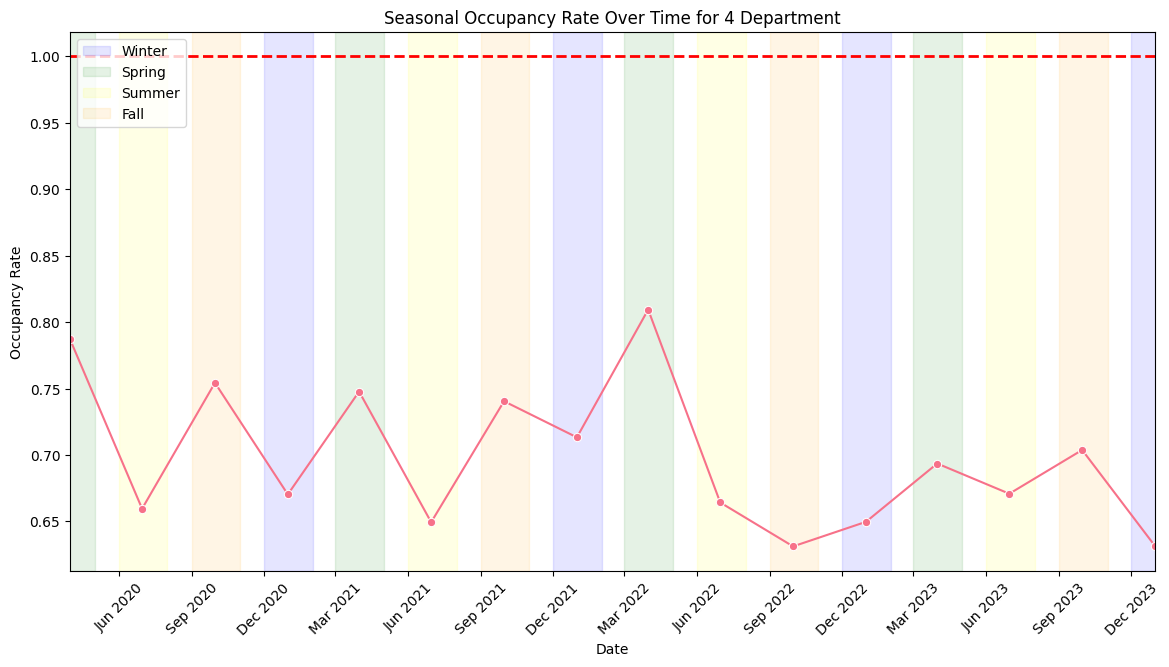

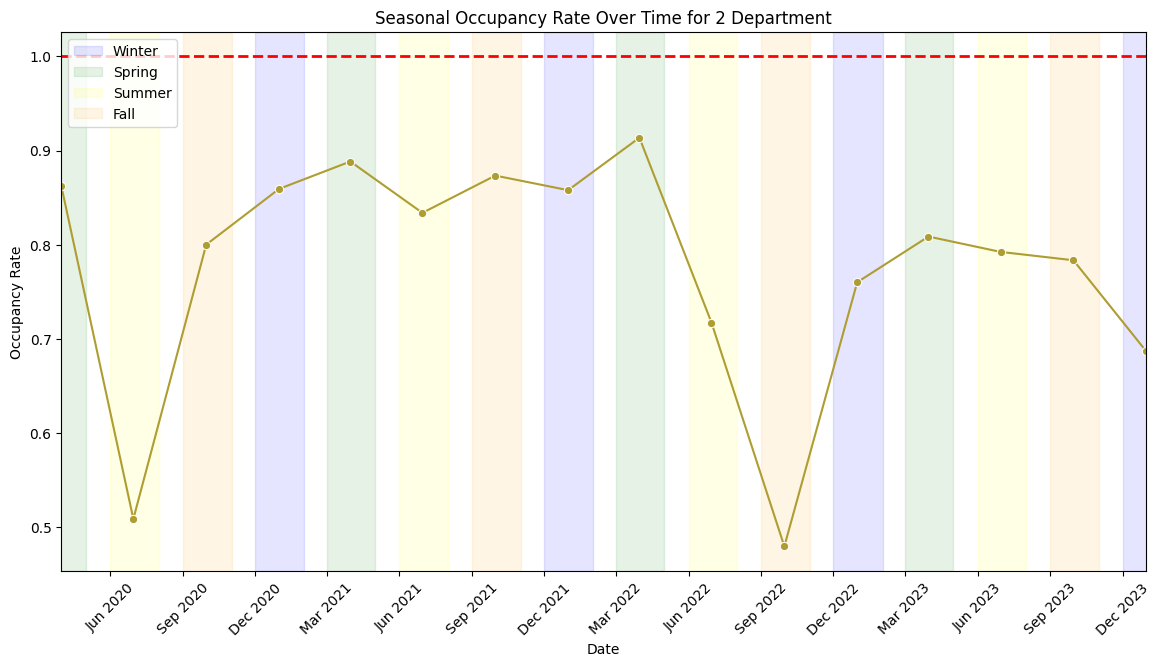

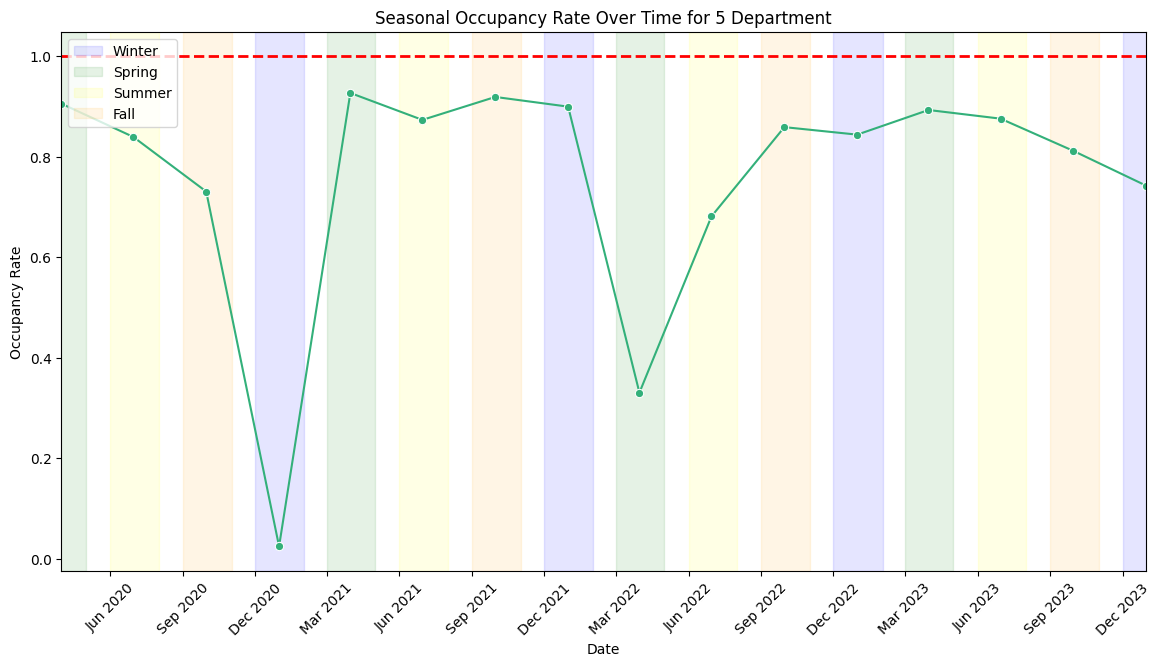

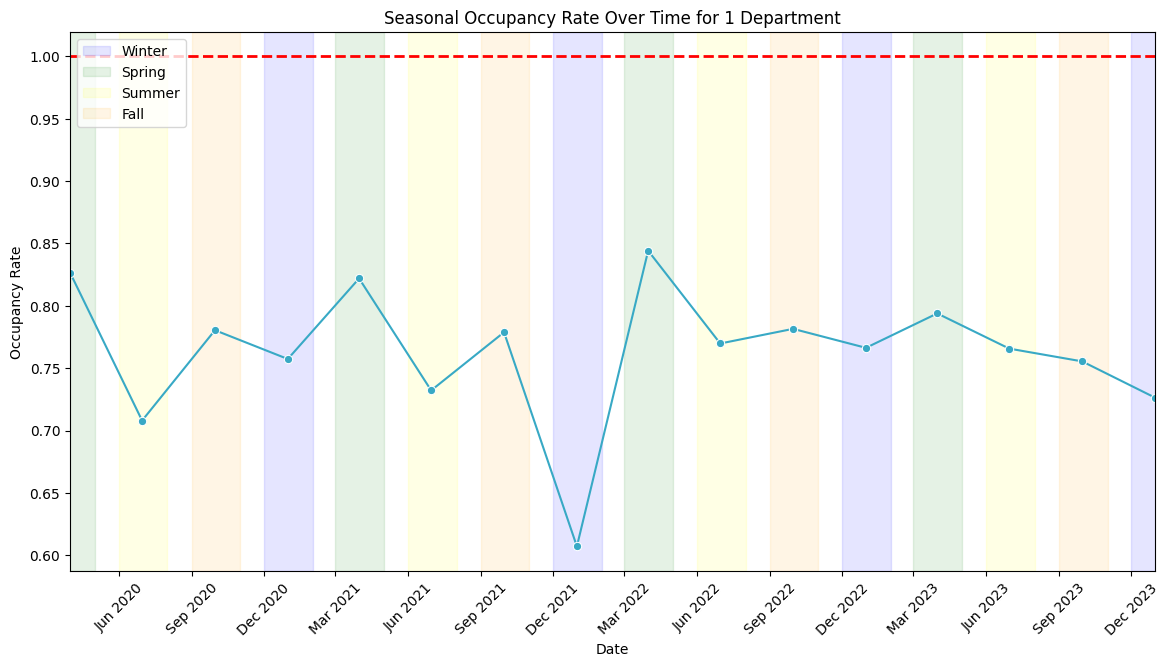

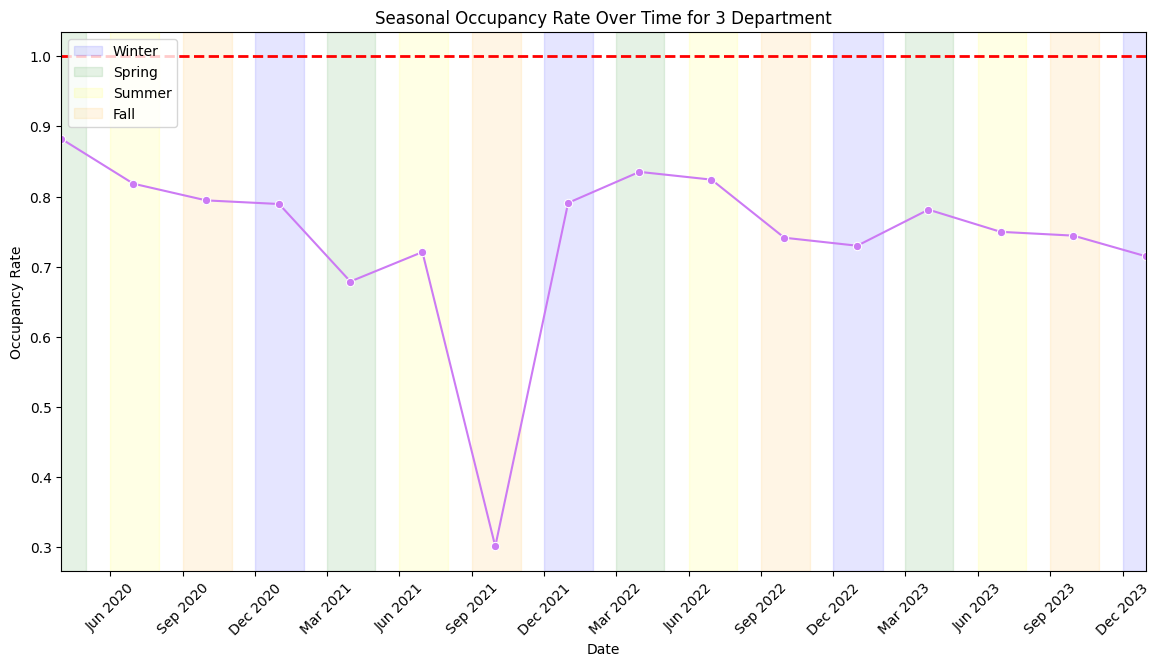

In [ ]:
# %%

import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# Define a color palette for the departments
palette = sns.color_palette("husl", len(departments))

# Create a line plot of Occupancy Rate over time for each department (aggregated by quarter/season)
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Resample the data to a quarterly frequency and calculate the mean occupancy rate for each quarter
    department_quarterly = department_df.resample("Q", on="Date").mean()

    # Create a line plot of Occupancy Rate over time (by quarter/season)
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        x=department_quarterly.index,
        y="Occupancy Rate",
        data=department_quarterly,
        marker="o",
        color=palette[idx],
    )

    # Add a red line at 100% Occupancy Rate
    plt.axhline(y=1.0, color="red", linestyle="--", linewidth=2)

    # Set x-axis major locator to quarter and format the labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

    # Ensure the x-axis matches the time period of the samples
    plt.xlim(department_quarterly.index.min(), department_quarterly.index.max())

    # Shade the seasons across all years
    for year in range(
        department_quarterly.index.year.min(), department_quarterly.index.year.max() + 1
    ):
        plt.axvspan(f"{year}-12", f"{year + 1}-02", color="blue", alpha=0.1)  # Winter
        plt.axvspan(f"{year}-03", f"{year}-05", color="green", alpha=0.1)  # Spring
        plt.axvspan(f"{year}-06", f"{year}-08", color="yellow", alpha=0.1)  # Summer
        plt.axvspan(f"{year}-09", f"{year}-11", color="orange", alpha=0.1)  # Fall

    # Add labels for the seasons
    winter_patch = mpatches.Patch(color="blue", alpha=0.1, label="Winter")
    spring_patch = mpatches.Patch(color="green", alpha=0.1, label="Spring")
    summer_patch = mpatches.Patch(color="yellow", alpha=0.1, label="Summer")
    fall_patch = mpatches.Patch(color="orange", alpha=0.1, label="Fall")

    plt.legend(
        handles=[winter_patch, spring_patch, summer_patch, fall_patch], loc="upper left"
    )

    plt.title(f"Seasonal Occupancy Rate Over Time for {department} Department")
    plt.xlabel("Date")
    plt.ylabel("Occupancy Rate")
    plt.xticks(rotation=45)
    plt.show()

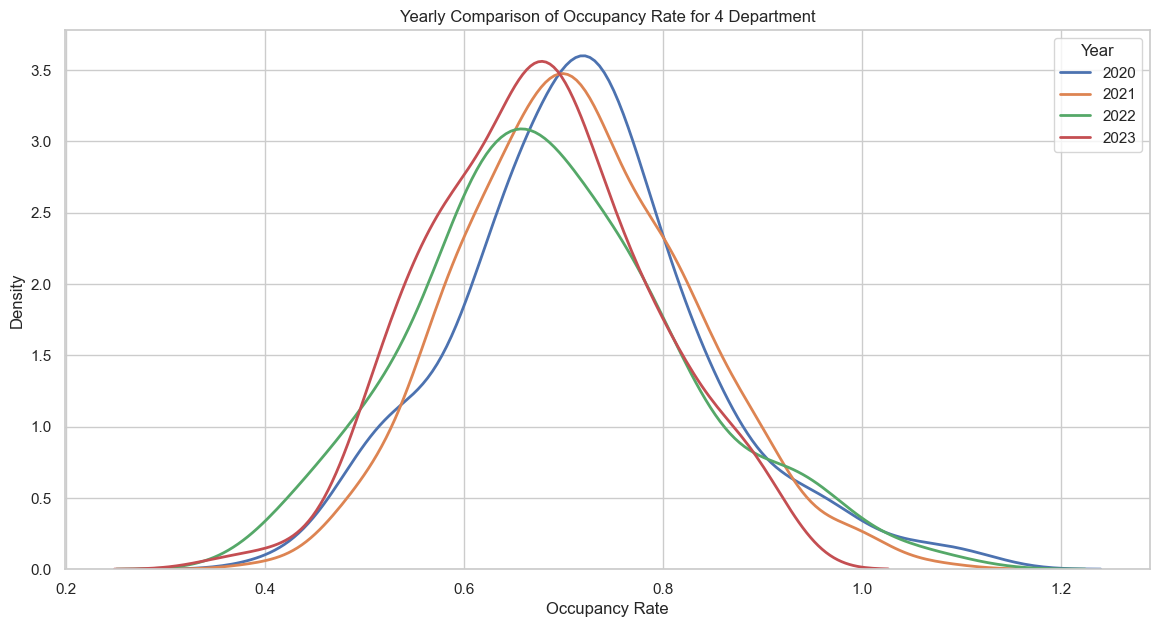

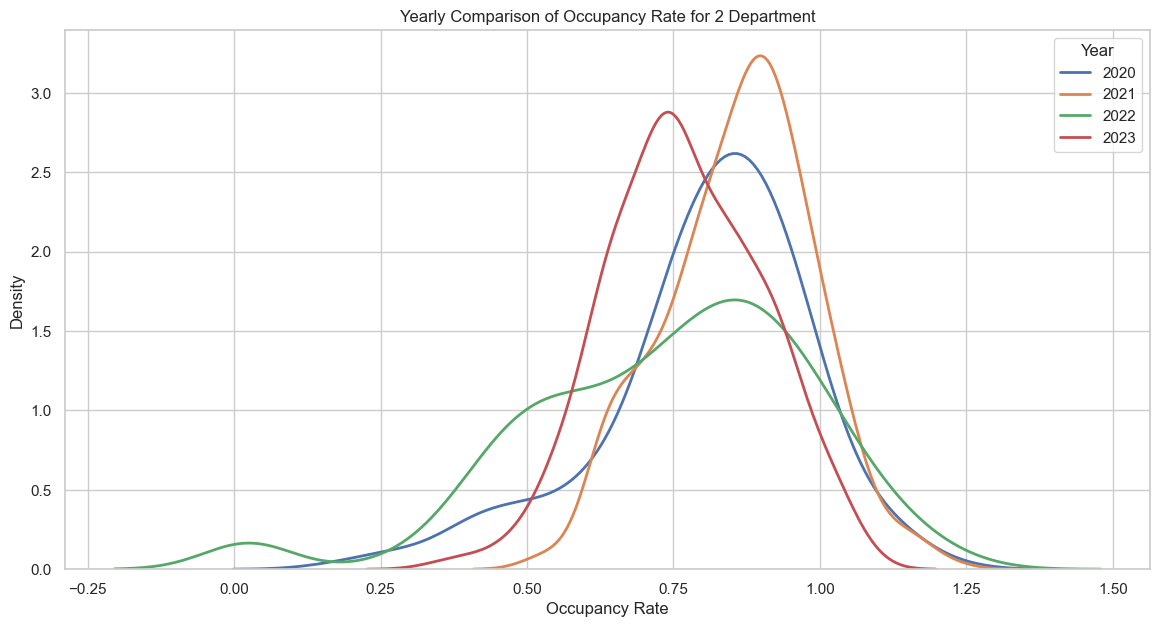

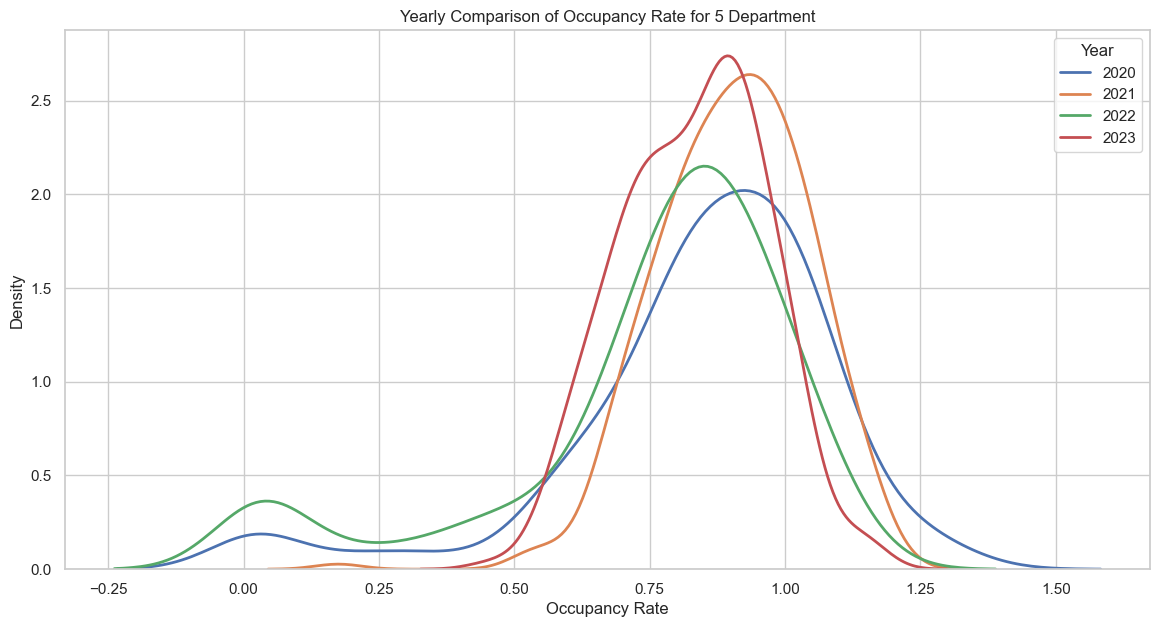

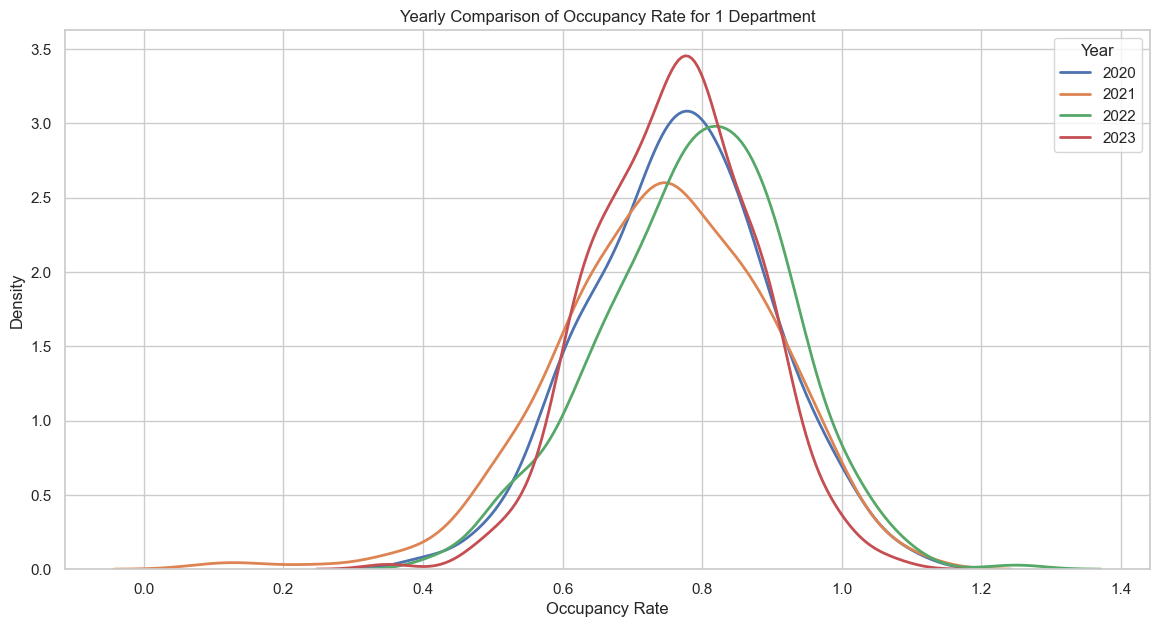

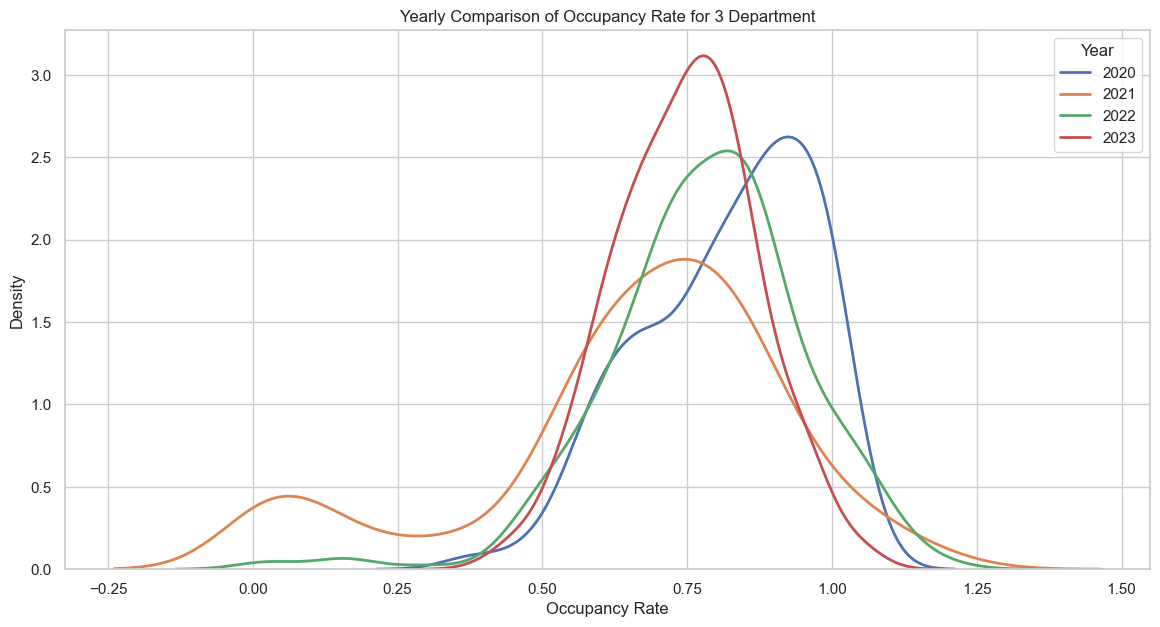

In [ ]:
# %%

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Resample the data by year for each department
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Resample the data by year
    department_yearly = department_df.resample("Y", on="Date").mean()

    # Create a figure for the yearly comparison plots
    plt.figure(figsize=(14, 7))

    # Plot the KDE for each year
    for year in department_yearly.index.year.unique():
        yearly_data = department_df[department_df["Date"].dt.year == year][
            "Occupancy Rate"
        ]
        sns.kdeplot(yearly_data, label=f"{year}", lw=2)

    plt.title(f"Yearly Comparison of Occupancy Rate for {department} Department")
    plt.xlabel("Occupancy Rate")
    plt.ylabel("Density")
    plt.legend(title="Year")
    plt.show()

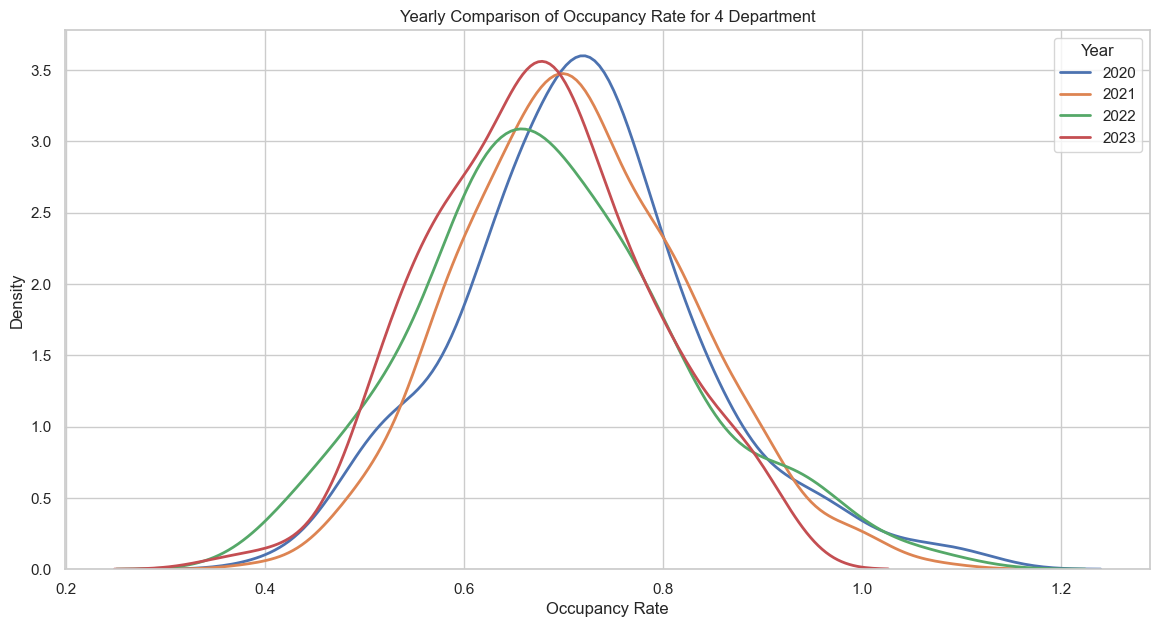

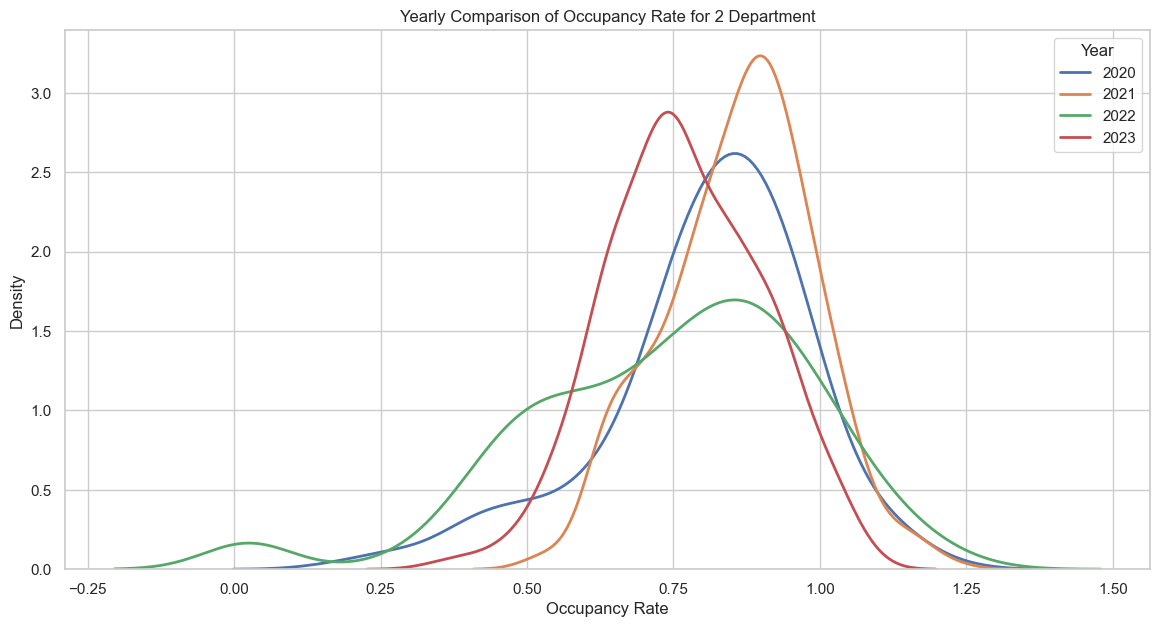

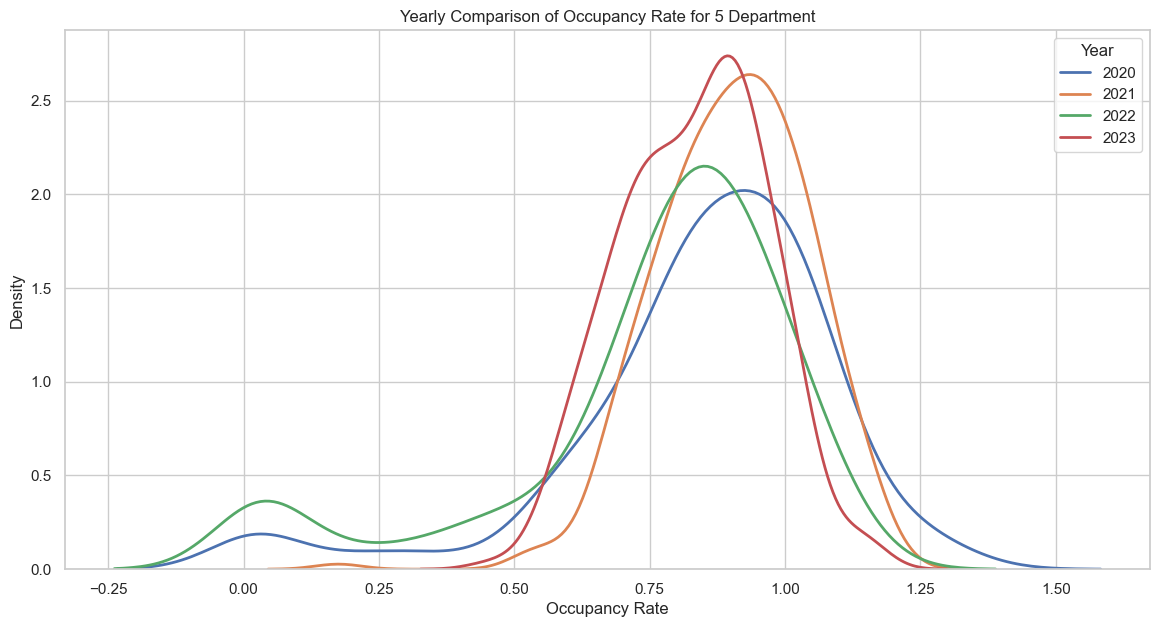

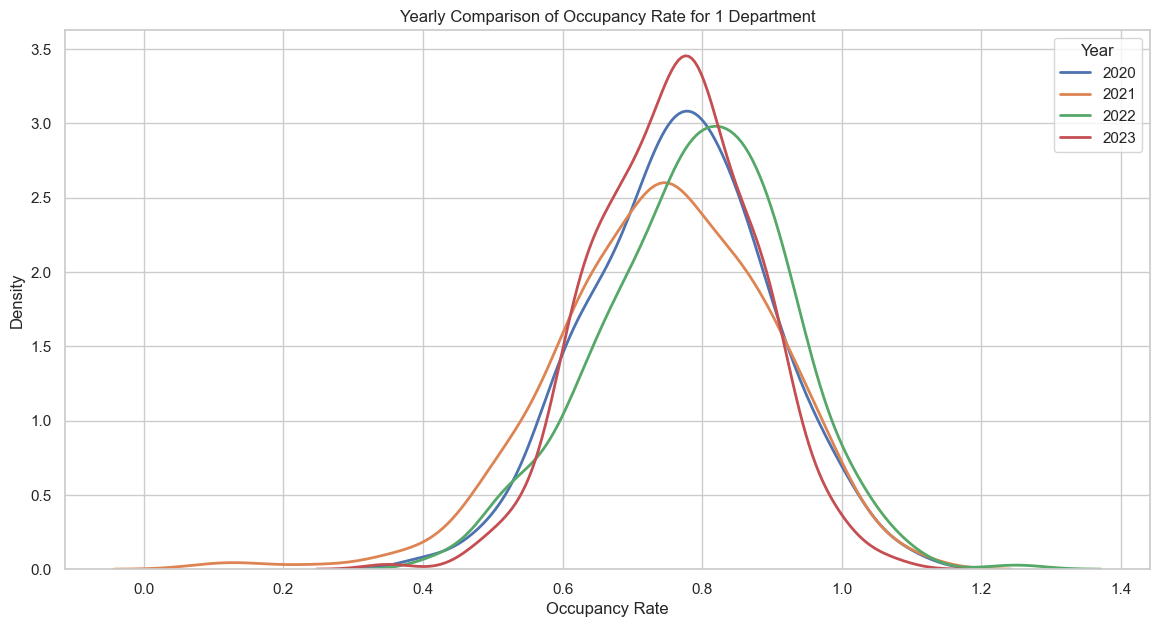

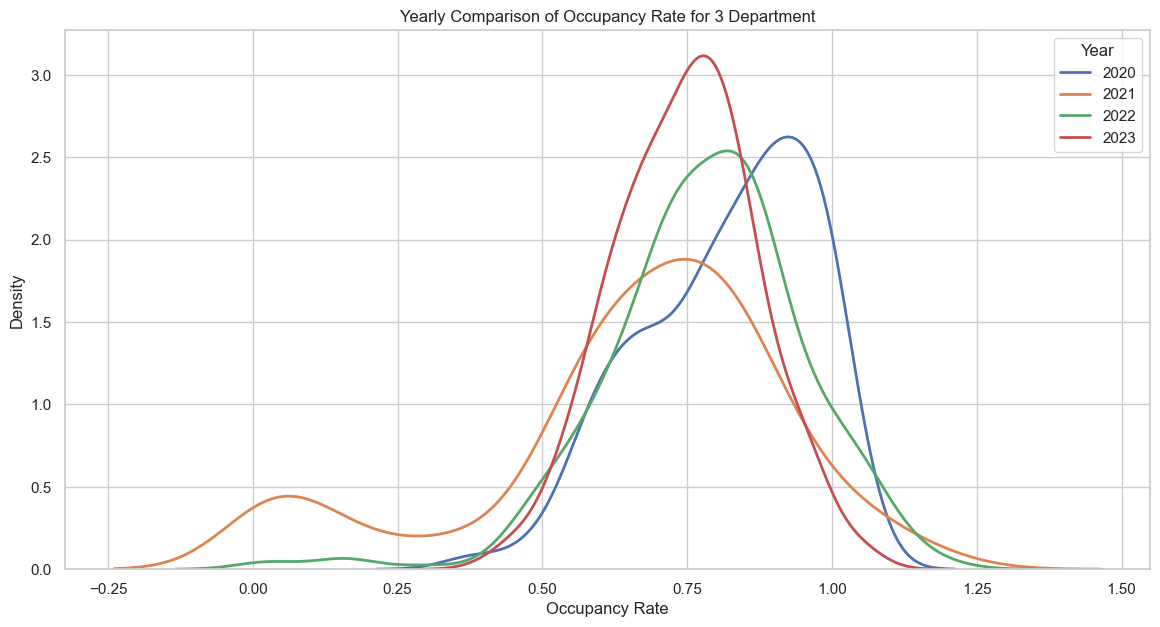

In [ ]:
# %%

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Resample the data by year for each department
for idx, department in enumerate(departments):
    # Filter the data for the specific department
    department_df = df[df["Department"] == department]

    # Resample the data by year
    department_yearly = department_df.resample("Y", on="Date").mean()

    # Create a figure for the yearly comparison plots
    plt.figure(figsize=(14, 7))

    # Plot the KDE for each year
    for year in department_yearly.index.year.unique():
        yearly_data = department_df[department_df["Date"].dt.year == year][
            "Occupancy Rate"
        ]
        sns.kdeplot(yearly_data, label=f"{year}", lw=2)

    plt.title(f"Yearly Comparison of Occupancy Rate for {department} Department")
    plt.xlabel("Occupancy Rate")
    plt.ylabel("Density")
    plt.legend(title="Year")
    plt.show()